In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('datasets/magic/dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
print(df.shape)

(19020, 11)


In [8]:
df[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

In [9]:
data_x = df.iloc[:, :-1]
data_y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Random Train/Test Split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y,
                                                    test_size=0.50, 
                                                    shuffle=True,
                                                    random_state=42)

# Normalization of features
min_max_scaler = MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)
test_x = min_max_scaler.transform(test_x)

# Create DataFrame from Numpy array
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

# Prevents issues with CV
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [11]:
print(train_y.value_counts())
print(test_y.value_counts())

g    6154
h    3356
Name: 10, dtype: int64
g    6178
h    3332
Name: 10, dtype: int64


In [13]:
train = pd.concat([train_x, train_y], axis=1)
validation = pd.concat([test_x, test_y], axis=1)

train.to_csv('gamma_train.csv', index=False)
validation.to_csv('gamma_test.csv', index=False)

## Post-processing of metric data
### Neural Network Plots

In [279]:
# Combine folds from cross validation
f1 = pd.read_csv('metrics/GA_f1.csv', header=None)
f2 = pd.read_csv('metrics/GA_f2.csv', header=None)
f1 = f1.T
f2 = f2.T

# Combine dataframes and calculate mean for each row
combo = pd.concat([f1, f2])
by_row_index = combo.groupby(combo.index)
opt_algo = by_row_index.mean()
opt_algo = opt_algo.rename(columns={0: 'Train Accuracy', 1: 'Train Time',
                          2: 'Test Accuracy', 3: 'Test Time'})
opt_algo.head()

,Train Accuracy,Train Time,Test Accuracy,Test Time
0,34.926393,0.5425,64.837014,0.0230
1,64.863302,0.5310,64.837014,0.0230
2,61.671924,0.5280,65.215563,0.0235
3,64.837014,0.5190,65.215563,0.0225
4,50.178759,0.5240,65.226078,0.0215


In [280]:
# Time processing
train_time = opt_algo.loc[:, 'Train Time']
test_time = opt_algo.loc[:, 'Test Time']
new_train_time = []
new_test_time = []

'''
Need to add up times over time for each iteration
'''

for i, time in enumerate(train_time):
    if i == 0:
        new_train_time.append(time)
    else:
        # Add previous and current times
        new_train_time.append(new_train_time[i - 1] + time)
        
for i, time in enumerate(test_time):
    if i == 0:
        new_test_time.append(time)
    else:
        # Add previous and current times
        new_test_time.append(new_test_time[i - 1] + time)

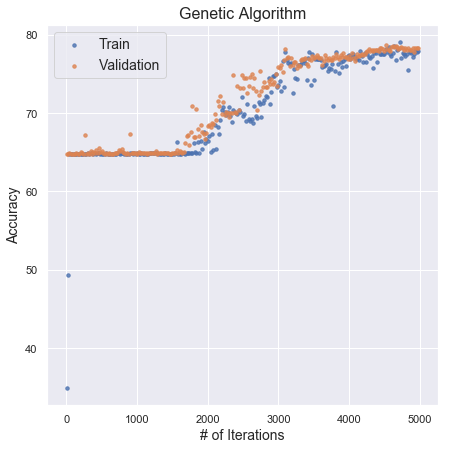

In [281]:
'''# of Iterations vs Accuracy Rate'''
iterations = [i for i in range(1, len(opt_algo) + 1, 20)]
train_acc = opt_algo.loc[:, 'Train Accuracy'][::20]
test_acc = opt_algo.loc[:, 'Test Accuracy'][::20]

# Change title, xlabel, ylabel appropriately
xlabel = '# of Iterations'
ylabel = 'Accuracy'
title = 'Genetic Algorithm'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=iterations, y=train_acc, label='Train', alpha=0.8, s=12)
plt.scatter(x=iterations, y=test_acc, label='Validation', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + title + '_' + xlabel + '_' + ylabel + ".png")

plt.show()

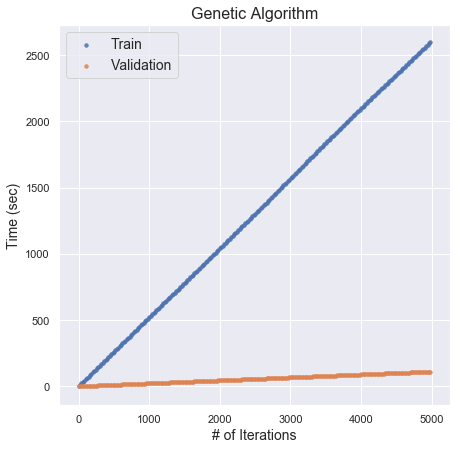

In [282]:
'''# of Iterations vs Time'''
final_train_time = new_train_time[::20]
final_test_time = new_test_time[::20]

# Change title, xlabel, ylabel appropriately
xlabel = '# of Iterations'
ylabel = 'Time (sec)'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=iterations, y=final_train_time, label='Train', alpha=0.8, s=12)
plt.scatter(x=iterations, y=final_test_time, label='Validation', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + title + '_' + xlabel + '_' + ylabel + ".png")

plt.show()

## OPTIMIZATION PROBLEMS

In [246]:
df = pd.read_csv('metrics/tsm_1000.csv', header=None)
df = df.T
df = df.rename(columns={0: 'RHC Accuracy', 1: 'RHC Time',
                        2: 'SA Accuracy', 3: 'SA Time',
                        4: 'GA Accuracy', 5: 'GA Time',
                        6: 'MIMIC Accuracy', 7: 'MIMIC Time',})
df.tail()

,RHC Accuracy,RHC Time,SA Accuracy,SA Time,GA Accuracy,GA Time,MIMIC Accuracy,MIMIC Time
95,0.082821,0.000,0.038549,0.000,0.152964,3.627,0.107872,17.388
96,0.093383,0.000,0.037516,0.001,0.155681,3.649,0.122263,17.545
97,0.111930,0.001,0.037203,0.000,0.154711,3.665,0.102040,17.878
98,0.099110,0.001,0.036701,0.000,0.144502,3.717,0.118606,17.907
99,0.094410,0.001,0.040894,0.000,0.155066,3.874,0.098389,18.023


In [248]:
df.shape

(100, 8)

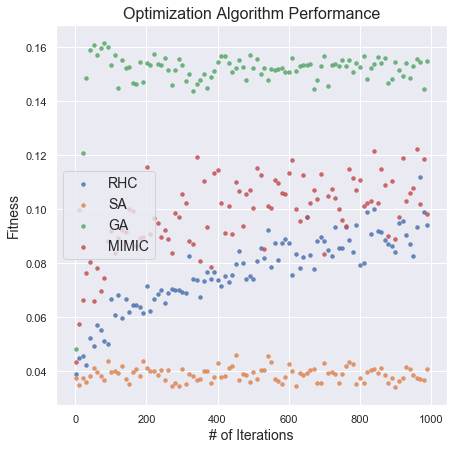

In [249]:
'''# of Iterations vs Metric'''
# Change Metrics and number of iterations appropriately
iterations1 = [i for i in range(1, 1001, 5)]   # Knapsack
iterations2 = [i for i in range(1, 1001, 10)]  # Fourpeaks, TSM
rhc_acc = df.loc[:, 'RHC Accuracy']
sa_acc = df.loc[:, 'SA Accuracy']
ga_acc = df.loc[:, 'GA Accuracy']
mimic_acc = df.loc[:, 'MIMIC Accuracy']
x = iterations2

# Change title, xlabel, ylabel appropriately
xlabel = '# of Iterations'
ylabel = 'Fitness'
title = 'Optimization Algorithm Performance'
problem = 'TSM'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=x, y=rhc_acc, label='RHC', alpha=0.8, s=12)
plt.scatter(x=x, y=sa_acc, label='SA', alpha=0.8, s=12)
plt.scatter(x=x, y=ga_acc, label='GA', alpha=0.8, s=12)
plt.scatter(x=x, y=mimic_acc, label='MIMIC', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + problem + '_' + title + '_' + ".png")

plt.show()

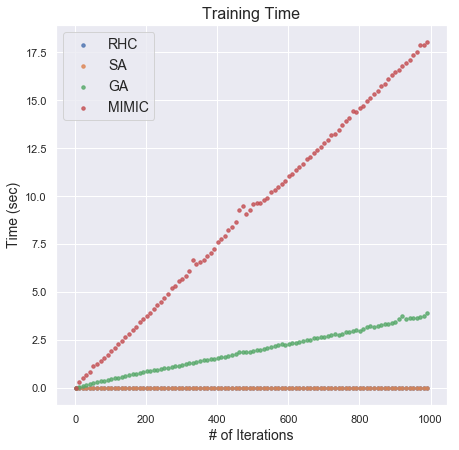

In [250]:
'''# of Iterations vs Time'''
# Change Metrics and number of iterations appropriately
rhc_time = df.loc[:, 'RHC Time']
sa_time = df.loc[:, 'SA Time']
ga_time = df.loc[:, 'GA Time']
mimic_time = df.loc[:, 'MIMIC Time']

# Change title, xlabel, ylabel appropriately
title = 'Training Time'
xlabel = '# of Iterations'
ylabel = 'Time (sec)'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=x, y=rhc_time, label='RHC', alpha=0.8, s=12)
plt.scatter(x=x, y=sa_time, label='SA', alpha=0.8, s=12)
plt.scatter(x=x, y=ga_time, label='GA', alpha=0.8, s=12)
plt.scatter(x=x, y=mimic_time, label='MIMIC', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + problem + '_' + title + '_' + ".png")

plt.show()

### Subgroup Plots

In [251]:
sub_df = pd.read_csv('metrics/tsm_rhc_sa_ga_50000.csv', header=None)
sub_df = sub_df.T
sub_df = sub_df.rename(columns={0: 'RHC Accuracy', 1: 'RHC Time',
                                2: 'SA Accuracy', 3: 'SA Time',
                                4: 'GA Accuracy', 5: 'GA Time'})
sub_df.tail()

,RHC Accuracy,RHC Time,SA Accuracy,SA Time,GA Accuracy,GA Time
45,0.131822,0.016,0.143872,0.017,0.152230,173.589
46,0.118917,0.019,0.130866,0.017,0.153069,171.028
47,0.132077,0.016,0.127226,0.018,0.152932,171.564
48,0.125149,0.017,0.127661,0.018,0.160977,173.848
49,0.144654,0.017,0.120175,0.018,0.155621,183.025


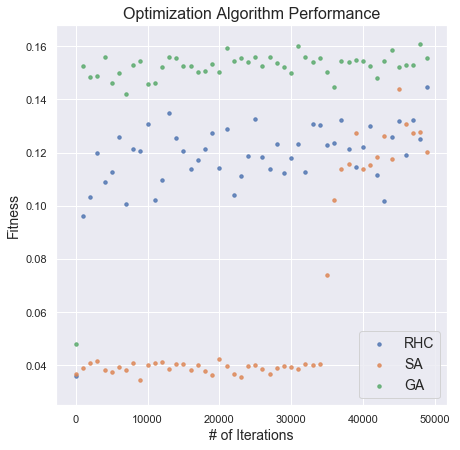

In [254]:
'''# of Iterations vs Metric'''
# Change Metrics and number of iterations appropriately
iterations1 = [i for i in range(1, 50001, 100)]            # FourPeaks
iterations2 = [i for i in range(1, 50001, 1000)]           # TSM
rhc_acc = sub_df.loc[:, 'RHC Accuracy']
sa_acc = sub_df.loc[:, 'SA Accuracy']
ga_acc = sub_df.loc[:, 'GA Accuracy']
x = iterations2

# Change title, xlabel, ylabel appropriately
xlabel = '# of Iterations'
ylabel = 'Fitness'
title = 'Optimization Algorithm Performance'
problem = 'TSM_rhc_sa_ga'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=x, y=rhc_acc, label='RHC', alpha=0.8, s=12)
plt.scatter(x=x, y=sa_acc, label='SA', alpha=0.8, s=12)
plt.scatter(x=x, y=ga_acc, label='GA', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + problem + '_' + title + '_' + ".png")

plt.show()

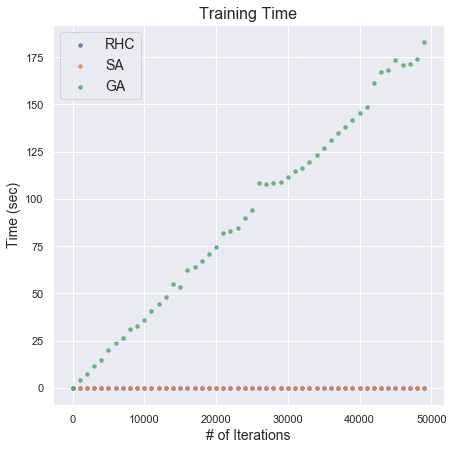

In [255]:
'''# of Iterations vs Time'''
# Change Metrics and number of iterations appropriately
rhc_time = sub_df.loc[:, 'RHC Time']
sa_time = sub_df.loc[:, 'SA Time']
ga_time = sub_df.loc[:, 'GA Time']

# Change title, xlabel, ylabel appropriately
title = 'Training Time'
xlabel = '# of Iterations'
ylabel = 'Time (sec)'

sns.set()
plt.figure(figsize=(7,7))
plt.scatter(x=x, y=rhc_time, label='RHC', alpha=0.8, s=12)
plt.scatter(x=x, y=sa_time, label='SA', alpha=0.8, s=12)
plt.scatter(x=x, y=ga_time, label='GA', alpha=0.8, s=12)

plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend(fontsize=14)

# Saving plots
plt.savefig("plots/" + problem + '_' + title + '_' + ".png")

plt.show()

In [304]:
# Exact data points
exact = pd.read_csv('metrics/GA_f1.csv', header=None)
exact = exact.T

index_start = 4500                # Optimal number of iterations
index_end = index_start + 5

exact.iloc[index_start:index_end, :]

,0,1,2,3
4500,78.370137,0.524,77.686646,0.022
4501,77.434280,0.525,77.686646,0.021
4502,78.538381,0.520,78.748686,0.021
4503,78.538381,0.521,78.748686,0.021
4504,75.352261,0.527,78.159832,0.022


In [305]:
# Time processing
train_time = exact.loc[:, 1]
test_time = exact.loc[:, 3]
new_train_time = []
new_test_time = []

'''
Need to add up times over time for each iteration
'''

for i, time in enumerate(train_time):
    if i == 0:
        new_train_time.append(time)
    else:
        # Add previous and current times
        new_train_time.append(new_train_time[i - 1] + time)
        
for i, time in enumerate(test_time):
    if i == 0:
        new_test_time.append(time)
    else:
        # Add previous and current times
        new_test_time.append(new_test_time[i - 1] + time)

In [306]:
new_train_time[index_start:index_end]

[2371.9210007190704,
 2372.4460005760193,
 2372.966000556946,
 2373.4870007038116,
 2374.0140006542206]